# Principal Component Analysis on animal attributes
Dataset: http://attributes.kyb.tuebingen.mpg.de.

This is a small data set that has information about 50 animals. The animals are listed in classes.txt. For each animal, the information consists of values for 85 features: does the animal have a tail, is it slow, does it have tusks, etc. The details of the features are in predicates.txt. The full data consists of a 50 × 85 matrix of real values, in predicate-matrix-continuous.txt.

We would like to visualize these animals in 2-d. 

## Parse in data

In [6]:
import pandas as pd

# import classes.txt
classes = pd.read_csv("Animals_with_Attributes/classes.txt", header=None, delimiter=r"\s+")
classes = classes.values[:, 1]
print(classes)
print(classes.shape)

['antelope' 'grizzly+bear' 'killer+whale' 'beaver' 'dalmatian'
 'persian+cat' 'horse' 'german+shepherd' 'blue+whale' 'siamese+cat' 'skunk'
 'mole' 'tiger' 'hippopotamus' 'leopard' 'moose' 'spider+monkey'
 'humpback+whale' 'elephant' 'gorilla' 'ox' 'fox' 'sheep' 'seal'
 'chimpanzee' 'hamster' 'squirrel' 'rhinoceros' 'rabbit' 'bat' 'giraffe'
 'wolf' 'chihuahua' 'rat' 'weasel' 'otter' 'buffalo' 'zebra' 'giant+panda'
 'deer' 'bobcat' 'pig' 'lion' 'mouse' 'polar+bear' 'collie' 'walrus'
 'raccoon' 'cow' 'dolphin']
(50,)


In [7]:
# do the same for predicates
predicates = pd.read_csv("Animals_with_Attributes/predicates.txt", header=None, delimiter=r"\s+")
predicates = predicates.values[:,1]
print(predicates.shape)
print(predicates)

(85,)
['black' 'white' 'blue' 'brown' 'gray' 'orange' 'red' 'yellow' 'patches'
 'spots' 'stripes' 'furry' 'hairless' 'toughskin' 'big' 'small' 'bulbous'
 'lean' 'flippers' 'hands' 'hooves' 'pads' 'paws' 'longleg' 'longneck'
 'tail' 'chewteeth' 'meatteeth' 'buckteeth' 'strainteeth' 'horns' 'claws'
 'tusks' 'smelly' 'flys' 'hops' 'swims' 'tunnels' 'walks' 'fast' 'slow'
 'strong' 'weak' 'muscle' 'bipedal' 'quadrapedal' 'active' 'inactive'
 'nocturnal' 'hibernate' 'agility' 'fish' 'meat' 'plankton' 'vegetation'
 'insects' 'forager' 'grazer' 'hunter' 'scavenger' 'skimmer' 'stalker'
 'newworld' 'oldworld' 'arctic' 'coastal' 'desert' 'bush' 'plains' 'forest'
 'fields' 'jungle' 'mountains' 'ocean' 'ground' 'water' 'tree' 'cave'
 'fierce' 'timid' 'smart' 'group' 'solitary' 'nestspot' 'domestic']


In [10]:
# parse in the dataset
dataset = pd.read_csv("Animals_with_Attributes/predicate-matrix-continuous.txt", header=None, delimiter=r"\s+")
dataset = dataset.values
print(dataset.shape)

(50, 85)


# Get PCA 

In [22]:
# run pca
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(dataset)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
# the U^T: direction matrix
direction = pca.components_
print(direction.shape)

(2, 85)


## Project each animal class in 2d

In [29]:
projected = np.matmul(direction, dataset.T)
projected.shape

(2, 50)

## Plot the projected points

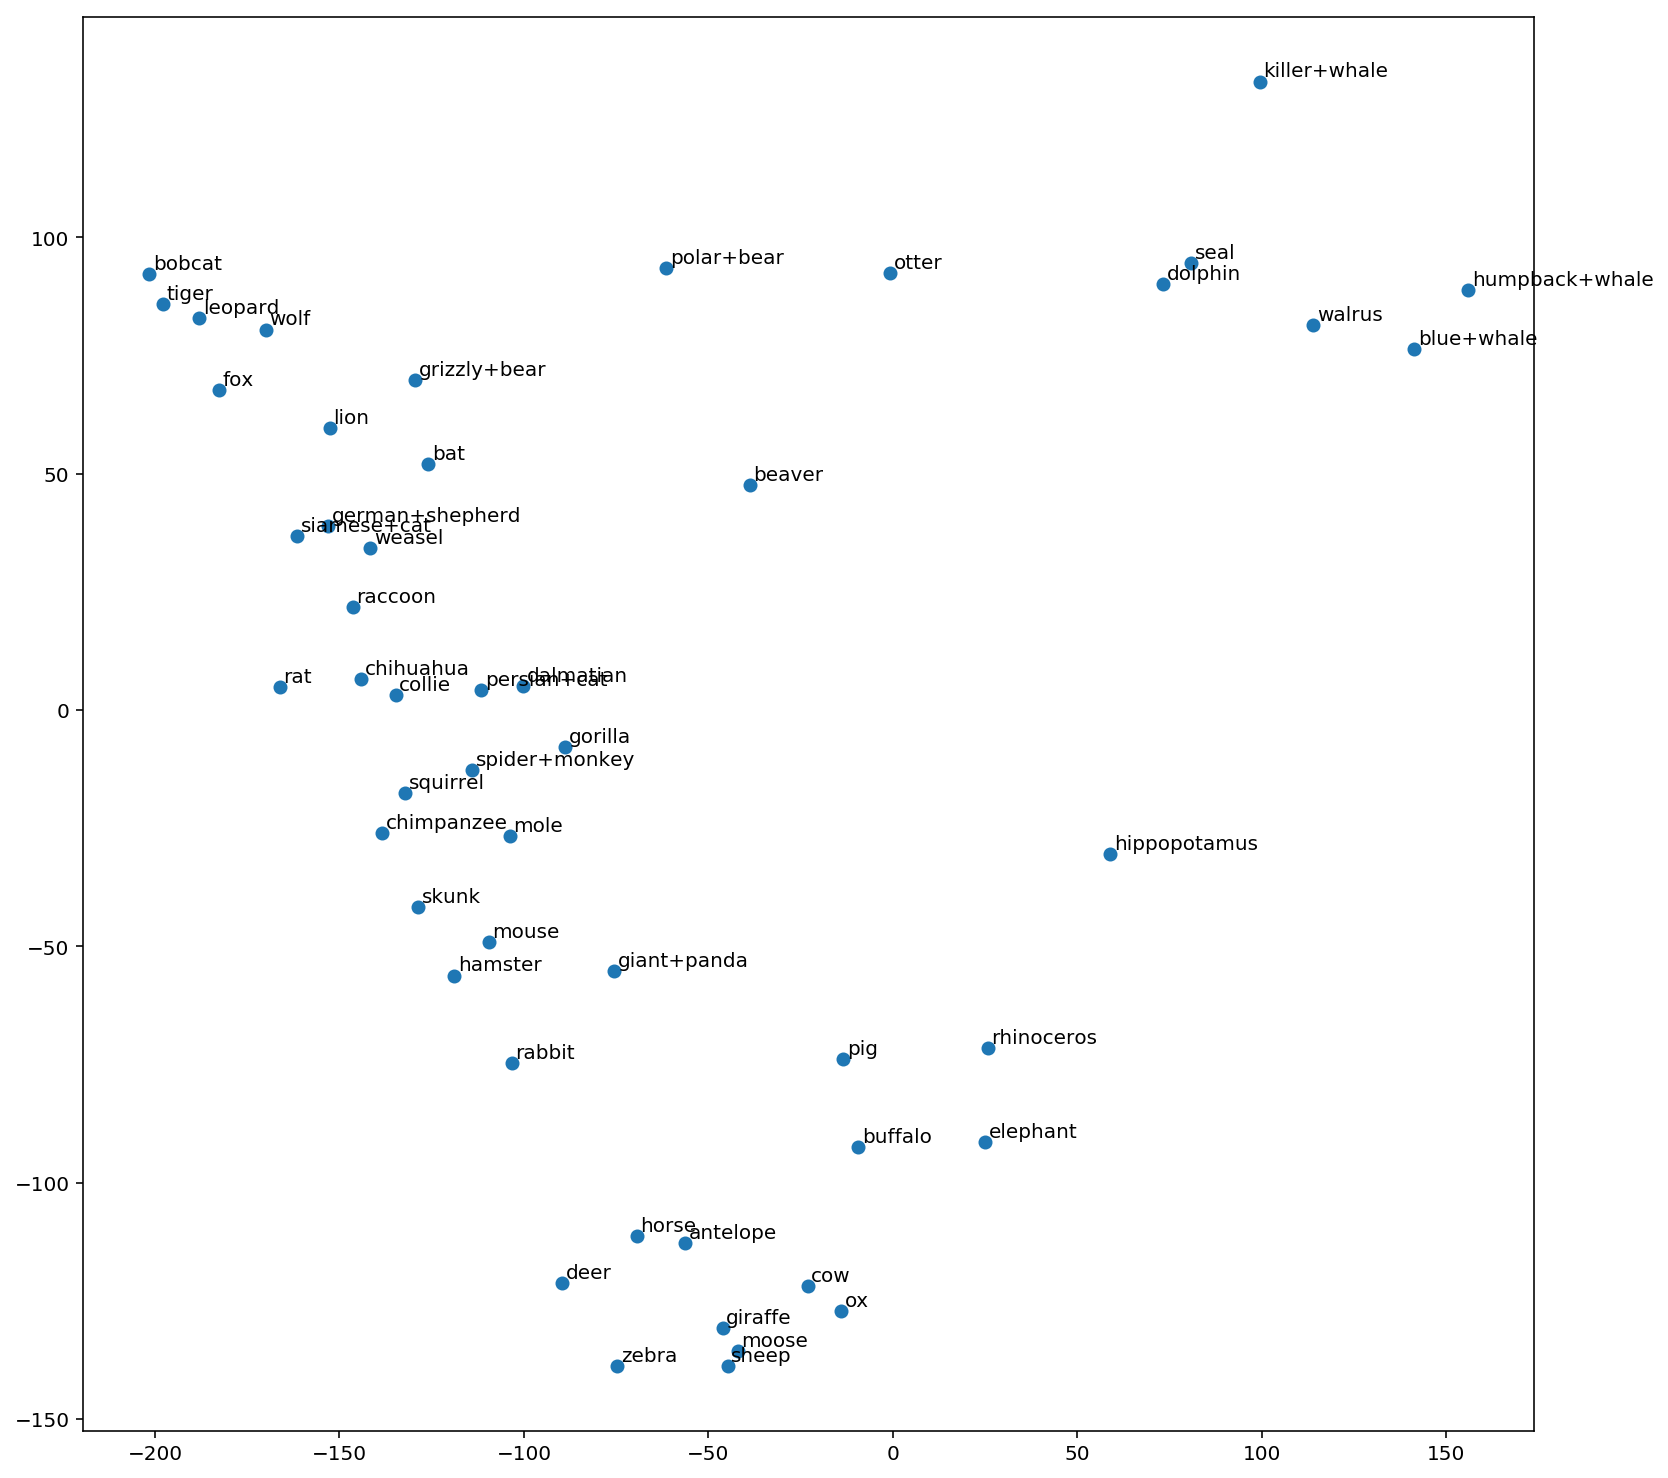

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
rcParams['figure.figsize'] = 13,13

plt.scatter(projected[0,:], projected[1, :])

for i in range(classes.shape[0]):
    x = projected[0, i]
    y = projected[1, i]
    plt.annotate(classes[i], xy=(x,y), xytext=(x+1,y+1))

plt.show()